In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.stats import poisson
import math

In [2]:
#data = np.zeros(shape=num_ev, dtype=[('timeStamp','f4')
data = pd.read_excel('/Users/user/Desktop/Bells_data_test.xlsx', dtype={'Name': str, 'Value': float})

In [3]:
data

,a_pc_0,b_pc_0,nc_pc_0_1,nc_pc_0_2,nc_pc_0_3,a_pc_45,b_pc_45,nc_pc_45_1,nc_pc_45_2,nc_pc_45_3
0,0,0,1.9041,1.6957,1.6873,45,0,1.1696,1.1436,1.1823
1,0,10,1.6709,NaN,NaN,45,10,1.5181,1.4899,1.4951
2,0,20,1.5015,NaN,NaN,45,20,1.6194,1.6321,1.6187
3,0,30,1.2353,NaN,NaN,45,30,1.7549,1.7266,1.7649
4,0,40,0.9736,NaN,NaN,45,40,1.7856,1.7911,1.7772
5,0,50,0.7097,NaN,NaN,45,50,1.7226,1.7262,1.7136
6,0,60,0.4744,NaN,NaN,45,60,1.5388,1.5633,1.6009
7,0,70,0.3267,NaN,NaN,45,70,1.3017,1.3045,1.3441
8,0,80,0.2408,NaN,NaN,45,80,1.0615,1.0743,1.0588
9,0,90,0.2461,0.2219,0.2213,45,90,0.8218,0.7787,0.7777


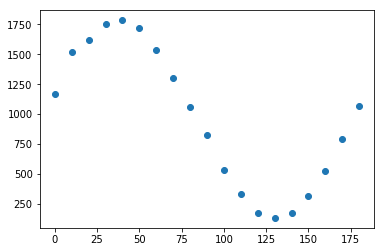

In [4]:
beta = data['b_pc_45']
alpha = data['a_pc_45']
Nc = data['nc_pc_45_1']*1000

plt.scatter(beta, Nc)

In [29]:
C_test = 
def N_constance(a, alpha, beta, theta, phim):
    a*((np.sin(alpha)**2)(np.sin(x)**2)(np.cos(theta)**2) + (np.cos(alpha)**2)(np.cos(x)**2)(np.sin(theta)**2) + 0.25(np.sin(2*alpha)*np.sin(2*x)*np.sin(2*theta)*np.cos(phim))) + C
    #return a * np.sin(b*x + d) + c

SyntaxError: invalid syntax (<ipython-input-29-75f25b806e91>, line 1)

In [128]:
C_raw = 255.9 #N(0,90)
A_raw = 1688.8 + 1765.7 + - 2*C_raw #N(0,0) + N(90,90) - 2C
print(A_raw)
ALPHA = 45

2942.7


In [255]:
def herbert(beta, alpha, Nc, firstGuess = []):
    theta = np.radians(firstGuess[0])
    phim = np.radians(firstGuess[1])
    beta = np.radians(beta)
    alpha = np.radians(alpha)
    
    theta_range = np.arange(theta - 1.0 , theta + 1.0, 0.05)
    phim_range = np.arange(phim - 1.0 , phim + 1.0, 0.05)

    optim_theta = 0
    optim_phim = 0
    
    #score = (N_global(beta, A_raw, alpha, theta - 1.0, phim - 1.0, C_raw) - Nc)**2
    
    scoreboard = 1000000000000000000000000
    
    for i in range(len(theta_range)):
        for j in range(len(phim_range)):
            #candidate evaluation starts
            sum_lsq = 0
            for k in range(len(beta)):
                lsq = (N_global(beta[k], A_raw, ALPHA, theta_range[i], phim_range[j], C_raw) - Nc[k])**2
                sum_lsq += lsq
                #print(sum_lsq)
            
            if(sum_lsq < scoreboard):
                #print("surpassed scoreboard")
                scoreboard = sum_lsq
                optim_theta = theta_range[i]
                optim_phim = phim_range[j]
                
    return optim_theta, optim_phim
        
    

In [253]:
def N_global(x, A, alpha, theta, phim, C):
    alpha = np.radians(alpha)
    #alpha = np.pi/4
    x = np.radians(x)
    theta = np.radians(theta)
    phim = np.radians(phim)

    return A * (( (np.sin(alpha)**2)*(np.sin(x)**2)*(np.cos(theta)**2) + (np.cos(alpha)**2)*(np.cos(x)**2)*(np.sin(theta)**2)) + 0.25*(np.sin(2*alpha)*np.sin(2*x)*np.sin(2*theta)*np.cos(phim))) + C



[-0.21460184 -0.20460184 -0.19460184 -0.18460184 -0.17460184 -0.16460184
 -0.15460184 -0.14460184 -0.13460184 -0.12460184 -0.11460184 -0.10460184
 -0.09460184 -0.08460184 -0.07460184 -0.06460184 -0.05460184 -0.04460184
 -0.03460184 -0.02460184 -0.01460184 -0.00460184  0.00539816  0.01539816
  0.02539816  0.03539816  0.04539816  0.05539816  0.06539816  0.07539816
  0.08539816  0.09539816  0.10539816  0.11539816  0.12539816  0.13539816
  0.14539816  0.15539816  0.16539816  0.17539816  0.18539816  0.19539816
  0.20539816  0.21539816  0.22539816  0.23539816  0.24539816  0.25539816
  0.26539816  0.27539816  0.28539816  0.29539816  0.30539816  0.31539816
  0.32539816  0.33539816  0.34539816  0.35539816  0.36539816  0.37539816
  0.38539816  0.39539816  0.40539816  0.41539816  0.42539816  0.43539816
  0.44539816  0.45539816  0.46539816  0.47539816  0.48539816  0.49539816
  0.50539816  0.51539816  0.52539816  0.53539816  0.54539816  0.55539816
  0.56539816  0.57539816  0.58539816  0.59539816  0

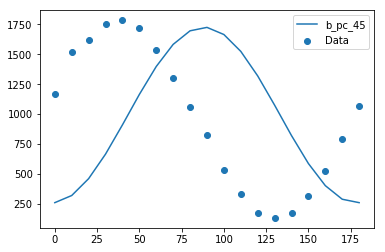

In [254]:
optimized_theta, optimized_phim = herbert(beta, alpha, Nc, firstGuess=[45.0, 0.01])
print(np.degrees(optimized_theta))
print(np.degrees(optimized_phim))

params = [4000, 45, 45, 10, 40]
plt.scatter(beta, Nc, label='Data')
plt.plot(beta, N_global(beta, 2942.7, 45, optimized_theta, optimized_phim, 255.9))
plt.legend(loc='best')
#plt.ylim(1020, 1050)

plt.show()

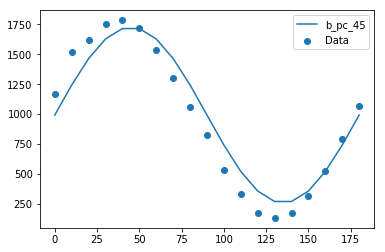

In [229]:
params = [4000, 45, 45, 10, 40]
plt.scatter(beta, Nc, label='Data')
plt.plot(beta, N_global(beta, 2942.7, 45, 45, 0.01, 255.9))
plt.legend(loc='best')
#plt.ylim(1020, 1050)

plt.show()

In [56]:
params, params_covariance = optimize.curve_fit(N_global, beta, Nc, p0=[4000, 45, 45, 10, 40])
#print(params)
#p0=[500, 45, 45, 20, 0.1]) this got us close
#params = [4000, 45, 45, 10, 40]

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

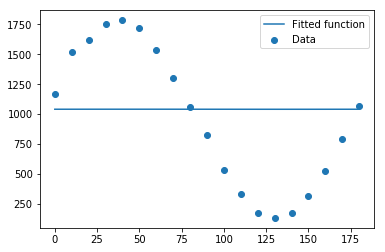

In [48]:
#plt.figure(figsize=(6, 4))
params = [4000, 45, 45, 10, 40]
plt.scatter(beta, Nc, label='Data')
#plt.plot(beta, N_global(beta, params[0], params[1], params[2], params[3], params[4]),
         #label='Fitted function')
plt.plot(beta, N_global(beta, ))
plt.legend(loc='best')
#plt.ylim(1020, 1050)

plt.show()

In [251]:
#lam = float(18.3165/18)
#error = scipy.stats.poisson(lam, size=len(beta))
xerr = beta #is this true?
yerr = np.zeros(len(Nc))
for i in range(len(Nc)):
    yerr[i] = np.sqrt(Nc[i])
    


In [55]:
def red_chisq(o, c, var, n, m):
    v = n - m
    chi = 0
    for i in range(0,18):
        chi = chi + ( (o[i] - c[i])**2) / (var[i]**2)
        #print(o[i]-c[i])
        print((o[i]-c[i])**2/var[i]**2)
    return chi / v

#red_chisq(Nc, test_func(beta, params[0], params[1], params[2], params[3]), yerr, 19, 3)

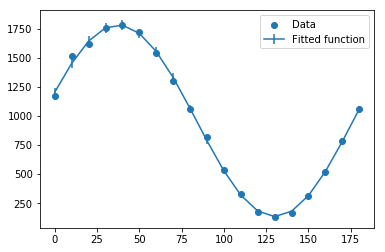

In [219]:
#plt.figure(figsize=(6, 4))
plt.scatter(beta, Nc, label='Data')
plt.errorbar(beta, test_func(beta, params[0], params[1], params[2], params[3]), yerr=yerr,
         label='Fitted function')
plt.legend(loc='best')

plt.show()